# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [150]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

61.293342467705344

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [227]:
city_json

{'coord': {'lon': 135.8833, 'lat': 46.4856},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 248.71,
  'feels_like': 243.49,
  'temp_min': 248.71,
  'temp_max': 248.71,
  'pressure': 1021,
  'humidity': 90,
  'sea_level': 1021,
  'grnd_level': 942},
 'visibility': 10000,
 'wind': {'speed': 2.1, 'deg': 223},
 'clouds': {'all': 100},
 'dt': 1611771545,
 'sys': {'country': 'RU', 'sunrise': 1611786306, 'sunset': 1611820404},
 'timezone': 36000,
 'id': 2013279,
 'name': 'Vostok',
 'cod': 200}

In [199]:
#Open weather url api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#Need Try except loop and loop for each city in cities
url = "http://api.openweathermap.org/data/2.5/weather?q="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_city = []
found_lats = []
found_longs = []
for i, each_city in enumerate(cities):
    display(f"Processing Record {i} of Set 1 | {each_city}")
    city_json = requests.get(f'{url}{each_city}&appid={weather_api_key}').json()
    
    try:
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        country.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        found_city.append(each_city)
        found_lats.append(city_json["coord"]["lat"])
        found_longs.append(city_json["coord"]["lon"])
    except:
        display("City not found. Skipping...")
        pass

'Processing Record 0 of Set 1 | bethel'

'Processing Record 1 of Set 1 | busselton'

'Processing Record 2 of Set 1 | tromso'

'Processing Record 3 of Set 1 | jalu'

'Processing Record 4 of Set 1 | conde'

'Processing Record 5 of Set 1 | kapaa'

'Processing Record 6 of Set 1 | meulaboh'

'Processing Record 7 of Set 1 | havelock'

'Processing Record 8 of Set 1 | nizhneyansk'

'City not found. Skipping...'

'Processing Record 9 of Set 1 | rikitea'

'Processing Record 10 of Set 1 | cape town'

'Processing Record 11 of Set 1 | belushya guba'

'City not found. Skipping...'

'Processing Record 12 of Set 1 | jamestown'

'Processing Record 13 of Set 1 | yellowknife'

'Processing Record 14 of Set 1 | bredasdorp'

'Processing Record 15 of Set 1 | gunjur'

'Processing Record 16 of Set 1 | kabanjahe'

'Processing Record 17 of Set 1 | mys shmidta'

'City not found. Skipping...'

'Processing Record 18 of Set 1 | mataura'

'Processing Record 19 of Set 1 | sumbe'

'Processing Record 20 of Set 1 | castro'

'Processing Record 21 of Set 1 | pacific grove'

'Processing Record 22 of Set 1 | barrow'

'Processing Record 23 of Set 1 | hithadhoo'

'Processing Record 24 of Set 1 | punta arenas'

'Processing Record 25 of Set 1 | puerto baquerizo moreno'

'Processing Record 26 of Set 1 | tasiilaq'

'Processing Record 27 of Set 1 | taolanaro'

'City not found. Skipping...'

'Processing Record 28 of Set 1 | north myrtle beach'

'Processing Record 29 of Set 1 | longyearbyen'

'Processing Record 30 of Set 1 | starachowice'

'Processing Record 31 of Set 1 | butaritari'

'Processing Record 32 of Set 1 | illoqqortoormiut'

'City not found. Skipping...'

'Processing Record 33 of Set 1 | port lincoln'

'Processing Record 34 of Set 1 | talcahuano'

'Processing Record 35 of Set 1 | avarua'

'Processing Record 36 of Set 1 | batagay-alyta'

'Processing Record 37 of Set 1 | kaniama'

'Processing Record 38 of Set 1 | qaanaaq'

'Processing Record 39 of Set 1 | catamarca'

'Processing Record 40 of Set 1 | marsabit'

'Processing Record 41 of Set 1 | alofi'

'Processing Record 42 of Set 1 | zhanjiang'

'Processing Record 43 of Set 1 | bluff'

'Processing Record 44 of Set 1 | port alfred'

'Processing Record 45 of Set 1 | baruun-urt'

'Processing Record 46 of Set 1 | berlevag'

'Processing Record 47 of Set 1 | pevek'

'Processing Record 48 of Set 1 | asyut'

'Processing Record 49 of Set 1 | touros'

'Processing Record 50 of Set 1 | upernavik'

'Processing Record 51 of Set 1 | vaini'

'Processing Record 52 of Set 1 | maldonado'

'Processing Record 53 of Set 1 | ribeira grande'

'Processing Record 54 of Set 1 | new norfolk'

'Processing Record 55 of Set 1 | albany'

'Processing Record 56 of Set 1 | souillac'

'Processing Record 57 of Set 1 | lebu'

'Processing Record 58 of Set 1 | bestobe'

'Processing Record 59 of Set 1 | skjervoy'

'Processing Record 60 of Set 1 | sepolno krajenskie'

'Processing Record 61 of Set 1 | los lunas'

'Processing Record 62 of Set 1 | umzimvubu'

'City not found. Skipping...'

'Processing Record 63 of Set 1 | ushuaia'

'Processing Record 64 of Set 1 | cherskiy'

'Processing Record 65 of Set 1 | basco'

'Processing Record 66 of Set 1 | acari'

'Processing Record 67 of Set 1 | srednekolymsk'

'Processing Record 68 of Set 1 | turbo'

'Processing Record 69 of Set 1 | thompson'

'Processing Record 70 of Set 1 | adelaide'

'Processing Record 71 of Set 1 | saskylakh'

'Processing Record 72 of Set 1 | manado'

'Processing Record 73 of Set 1 | galdar'

'Processing Record 74 of Set 1 | port elizabeth'

'Processing Record 75 of Set 1 | matara'

'Processing Record 76 of Set 1 | chuy'

'Processing Record 77 of Set 1 | aasiaat'

'Processing Record 78 of Set 1 | oyem'

'Processing Record 79 of Set 1 | namibe'

'Processing Record 80 of Set 1 | vila'

'Processing Record 81 of Set 1 | luderitz'

'Processing Record 82 of Set 1 | mar del plata'

'Processing Record 83 of Set 1 | victoria'

'Processing Record 84 of Set 1 | samusu'

'City not found. Skipping...'

'Processing Record 85 of Set 1 | rio gallegos'

'Processing Record 86 of Set 1 | utiroa'

'City not found. Skipping...'

'Processing Record 87 of Set 1 | sorvag'

'City not found. Skipping...'

'Processing Record 88 of Set 1 | san andres del rabanedo'

'Processing Record 89 of Set 1 | abu dhabi'

'Processing Record 90 of Set 1 | yetholm'

'City not found. Skipping...'

'Processing Record 91 of Set 1 | esperance'

'Processing Record 92 of Set 1 | tual'

'Processing Record 93 of Set 1 | grand gaube'

'Processing Record 94 of Set 1 | provideniya'

'Processing Record 95 of Set 1 | kodinsk'

'Processing Record 96 of Set 1 | gladstone'

'Processing Record 97 of Set 1 | bambanglipuro'

'Processing Record 98 of Set 1 | leshukonskoye'

'Processing Record 99 of Set 1 | hobart'

'Processing Record 100 of Set 1 | formello'

'Processing Record 101 of Set 1 | koulikoro'

'Processing Record 102 of Set 1 | itupiranga'

'Processing Record 103 of Set 1 | carson city'

'Processing Record 104 of Set 1 | bereda'

'Processing Record 105 of Set 1 | severo-kurilsk'

'Processing Record 106 of Set 1 | gunnedah'

'Processing Record 107 of Set 1 | te anau'

'Processing Record 108 of Set 1 | macusani'

'Processing Record 109 of Set 1 | cidreira'

'Processing Record 110 of Set 1 | lagoa'

'Processing Record 111 of Set 1 | tagusao'

'Processing Record 112 of Set 1 | kamaishi'

'Processing Record 113 of Set 1 | georgetown'

'Processing Record 114 of Set 1 | merrill'

'Processing Record 115 of Set 1 | kavaratti'

'Processing Record 116 of Set 1 | saint george'

'Processing Record 117 of Set 1 | popondetta'

'Processing Record 118 of Set 1 | atar'

'Processing Record 119 of Set 1 | palabuhanratu'

'City not found. Skipping...'

'Processing Record 120 of Set 1 | quatre cocos'

'Processing Record 121 of Set 1 | hermanus'

'Processing Record 122 of Set 1 | jijiang'

'Processing Record 123 of Set 1 | sisimiut'

'Processing Record 124 of Set 1 | dunedin'

'Processing Record 125 of Set 1 | santa rosalia'

'Processing Record 126 of Set 1 | trelew'

'Processing Record 127 of Set 1 | derzhavinsk'

'Processing Record 128 of Set 1 | tazovskiy'

'Processing Record 129 of Set 1 | kolo'

'Processing Record 130 of Set 1 | necochea'

'Processing Record 131 of Set 1 | puerto ayora'

'Processing Record 132 of Set 1 | nanortalik'

'Processing Record 133 of Set 1 | norman wells'

'Processing Record 134 of Set 1 | chokurdakh'

'Processing Record 135 of Set 1 | soavinandriana'

'Processing Record 136 of Set 1 | dali'

'Processing Record 137 of Set 1 | puerto carreno'

'Processing Record 138 of Set 1 | jijiga'

'Processing Record 139 of Set 1 | barentsburg'

'City not found. Skipping...'

'Processing Record 140 of Set 1 | clyde river'

'Processing Record 141 of Set 1 | aktau'

'Processing Record 142 of Set 1 | dicabisagan'

'Processing Record 143 of Set 1 | paradwip'

'City not found. Skipping...'

'Processing Record 144 of Set 1 | hasaki'

'Processing Record 145 of Set 1 | kumla'

'Processing Record 146 of Set 1 | tabou'

'Processing Record 147 of Set 1 | kulhudhuffushi'

'Processing Record 148 of Set 1 | east london'

'Processing Record 149 of Set 1 | la rioja'

'Processing Record 150 of Set 1 | mehamn'

'Processing Record 151 of Set 1 | lorengau'

'Processing Record 152 of Set 1 | cabo san lucas'

'Processing Record 153 of Set 1 | avera'

'Processing Record 154 of Set 1 | naze'

'Processing Record 155 of Set 1 | nobres'

'Processing Record 156 of Set 1 | hovd'

'Processing Record 157 of Set 1 | vaitupu'

'City not found. Skipping...'

'Processing Record 158 of Set 1 | ujszilvas'

'Processing Record 159 of Set 1 | lasa'

'Processing Record 160 of Set 1 | chifeng'

'Processing Record 161 of Set 1 | kahului'

'Processing Record 162 of Set 1 | forestville'

'Processing Record 163 of Set 1 | ballitoville'

'Processing Record 164 of Set 1 | abu jubayhah'

'City not found. Skipping...'

'Processing Record 165 of Set 1 | gallup'

'Processing Record 166 of Set 1 | bengkulu'

'Processing Record 167 of Set 1 | conceicao da barra'

'Processing Record 168 of Set 1 | mahebourg'

'Processing Record 169 of Set 1 | mananjary'

'Processing Record 170 of Set 1 | kodiak'

'Processing Record 171 of Set 1 | chakia'

'Processing Record 172 of Set 1 | gizo'

'Processing Record 173 of Set 1 | santa isabel do rio negro'

'Processing Record 174 of Set 1 | kirakira'

'Processing Record 175 of Set 1 | dawson'

'Processing Record 176 of Set 1 | koutsouras'

'Processing Record 177 of Set 1 | iqaluit'

'Processing Record 178 of Set 1 | aloleng'

'Processing Record 179 of Set 1 | biak'

'Processing Record 180 of Set 1 | noratus'

'Processing Record 181 of Set 1 | grand river south east'

'City not found. Skipping...'

'Processing Record 182 of Set 1 | anadyr'

'Processing Record 183 of Set 1 | atuona'

'Processing Record 184 of Set 1 | manoel urbano'

'Processing Record 185 of Set 1 | banjar'

'Processing Record 186 of Set 1 | sitka'

'Processing Record 187 of Set 1 | nikolskoye'

'Processing Record 188 of Set 1 | verkhnevilyuysk'

'Processing Record 189 of Set 1 | santiago de cao'

'Processing Record 190 of Set 1 | callaway'

'Processing Record 191 of Set 1 | lolua'

'City not found. Skipping...'

'Processing Record 192 of Set 1 | southbridge'

'Processing Record 193 of Set 1 | moanda'

'Processing Record 194 of Set 1 | hilo'

'Processing Record 195 of Set 1 | okhotsk'

'Processing Record 196 of Set 1 | trairi'

'Processing Record 197 of Set 1 | ewo'

'Processing Record 198 of Set 1 | carnarvon'

'Processing Record 199 of Set 1 | kalaleh'

'Processing Record 200 of Set 1 | bodden town'

'Processing Record 201 of Set 1 | roebourne'

'Processing Record 202 of Set 1 | fukue'

'Processing Record 203 of Set 1 | katha'

'City not found. Skipping...'

'Processing Record 204 of Set 1 | amderma'

'City not found. Skipping...'

'Processing Record 205 of Set 1 | bathsheba'

'Processing Record 206 of Set 1 | lavrentiya'

'Processing Record 207 of Set 1 | lokosovo'

'Processing Record 208 of Set 1 | faanui'

'Processing Record 209 of Set 1 | katsuura'

'Processing Record 210 of Set 1 | tsihombe'

'City not found. Skipping...'

'Processing Record 211 of Set 1 | san cristobal'

'Processing Record 212 of Set 1 | rudbar'

'Processing Record 213 of Set 1 | saleaula'

'City not found. Skipping...'

'Processing Record 214 of Set 1 | pandamatenga'

'Processing Record 215 of Set 1 | urubamba'

'Processing Record 216 of Set 1 | nizhniy baskunchak'

'Processing Record 217 of Set 1 | gat'

'Processing Record 218 of Set 1 | ilulissat'

'Processing Record 219 of Set 1 | kourou'

'Processing Record 220 of Set 1 | khatanga'

'Processing Record 221 of Set 1 | birao'

'Processing Record 222 of Set 1 | mporokoso'

'Processing Record 223 of Set 1 | trujillo'

'Processing Record 224 of Set 1 | coihaique'

'Processing Record 225 of Set 1 | porosozero'

'Processing Record 226 of Set 1 | porto novo'

'Processing Record 227 of Set 1 | aguada de pasajeros'

'Processing Record 228 of Set 1 | rawson'

'Processing Record 229 of Set 1 | marcona'

'City not found. Skipping...'

'Processing Record 230 of Set 1 | ancud'

'Processing Record 231 of Set 1 | tabat'

'Processing Record 232 of Set 1 | torbay'

'Processing Record 233 of Set 1 | kununurra'

'Processing Record 234 of Set 1 | flinders'

'Processing Record 235 of Set 1 | ouadda'

'Processing Record 236 of Set 1 | attawapiskat'

'City not found. Skipping...'

'Processing Record 237 of Set 1 | menomonie'

'Processing Record 238 of Set 1 | toba'

'Processing Record 239 of Set 1 | mogadishu'

'Processing Record 240 of Set 1 | san joaquin'

'Processing Record 241 of Set 1 | harper'

'Processing Record 242 of Set 1 | maragogi'

'Processing Record 243 of Set 1 | isoka'

'Processing Record 244 of Set 1 | sulangan'

'Processing Record 245 of Set 1 | kropotkin'

'Processing Record 246 of Set 1 | korla'

'Processing Record 247 of Set 1 | merritt'

'Processing Record 248 of Set 1 | iracoubo'

'Processing Record 249 of Set 1 | slave lake'

'Processing Record 250 of Set 1 | kaduqli'

'Processing Record 251 of Set 1 | nguiu'

'City not found. Skipping...'

'Processing Record 252 of Set 1 | santo antonio do ica'

'Processing Record 253 of Set 1 | apan'

'Processing Record 254 of Set 1 | ialibu'

'Processing Record 255 of Set 1 | bjornevatn'

'Processing Record 256 of Set 1 | sumkino'

'Processing Record 257 of Set 1 | kyaikkami'

'Processing Record 258 of Set 1 | flagstaff'

'Processing Record 259 of Set 1 | fairbanks'

'Processing Record 260 of Set 1 | ceres'

'Processing Record 261 of Set 1 | vila franca do campo'

'Processing Record 262 of Set 1 | najran'

'Processing Record 263 of Set 1 | cayenne'

'Processing Record 264 of Set 1 | batemans bay'

'Processing Record 265 of Set 1 | saint-philippe'

'Processing Record 266 of Set 1 | kabare'

'Processing Record 267 of Set 1 | ruthin'

'Processing Record 268 of Set 1 | helong'

'Processing Record 269 of Set 1 | volosovo'

'Processing Record 270 of Set 1 | ankang'

'Processing Record 271 of Set 1 | asayita'

'City not found. Skipping...'

'Processing Record 272 of Set 1 | iguape'

'Processing Record 273 of Set 1 | arraial do cabo'

'Processing Record 274 of Set 1 | oussouye'

'Processing Record 275 of Set 1 | lucea'

'Processing Record 276 of Set 1 | yuanping'

'Processing Record 277 of Set 1 | sibu'

'Processing Record 278 of Set 1 | inirida'

'Processing Record 279 of Set 1 | kharp'

'Processing Record 280 of Set 1 | virginia beach'

'Processing Record 281 of Set 1 | bambous virieux'

'Processing Record 282 of Set 1 | shache'

'Processing Record 283 of Set 1 | penzance'

'Processing Record 284 of Set 1 | meyungs'

'City not found. Skipping...'

'Processing Record 285 of Set 1 | uribia'

'Processing Record 286 of Set 1 | oranjemund'

'Processing Record 287 of Set 1 | chagda'

'City not found. Skipping...'

'Processing Record 288 of Set 1 | komsomolskiy'

'Processing Record 289 of Set 1 | phulji'

'Processing Record 290 of Set 1 | taitung'

'Processing Record 291 of Set 1 | santa maria'

'Processing Record 292 of Set 1 | santa cruz del sur'

'Processing Record 293 of Set 1 | dikson'

'Processing Record 294 of Set 1 | seoul'

'Processing Record 295 of Set 1 | yumen'

'Processing Record 296 of Set 1 | sentyabrskiy'

'City not found. Skipping...'

'Processing Record 297 of Set 1 | yerbogachen'

'Processing Record 298 of Set 1 | san patricio'

'Processing Record 299 of Set 1 | hazorasp'

'Processing Record 300 of Set 1 | half moon bay'

'Processing Record 301 of Set 1 | ostrovnoy'

'Processing Record 302 of Set 1 | afgoye'

'City not found. Skipping...'

'Processing Record 303 of Set 1 | sol-iletsk'

'Processing Record 304 of Set 1 | nhulunbuy'

'Processing Record 305 of Set 1 | teya'

'Processing Record 306 of Set 1 | samana'

'Processing Record 307 of Set 1 | pisco'

'Processing Record 308 of Set 1 | dire'

'Processing Record 309 of Set 1 | san quintin'

'Processing Record 310 of Set 1 | airai'

'Processing Record 311 of Set 1 | erdaojiang'

'Processing Record 312 of Set 1 | kalino'

'Processing Record 313 of Set 1 | klaksvik'

'Processing Record 314 of Set 1 | bozuyuk'

'Processing Record 315 of Set 1 | new bedford'

'Processing Record 316 of Set 1 | sabzevar'

'Processing Record 317 of Set 1 | aquiles serdan'

'Processing Record 318 of Set 1 | maykor'

'Processing Record 319 of Set 1 | nazret'

'Processing Record 320 of Set 1 | tuktoyaktuk'

'Processing Record 321 of Set 1 | port augusta'

'Processing Record 322 of Set 1 | teguldet'

'Processing Record 323 of Set 1 | kloulklubed'

'Processing Record 324 of Set 1 | nioro'

'Processing Record 325 of Set 1 | dingle'

'Processing Record 326 of Set 1 | cedral'

'Processing Record 327 of Set 1 | sora'

'Processing Record 328 of Set 1 | bartica'

'Processing Record 329 of Set 1 | victoriaville'

'Processing Record 330 of Set 1 | palmer'

'Processing Record 331 of Set 1 | aksu'

'Processing Record 332 of Set 1 | talnakh'

'Processing Record 333 of Set 1 | opuwo'

'Processing Record 334 of Set 1 | lyubar'

'Processing Record 335 of Set 1 | portland'

'Processing Record 336 of Set 1 | kaitangata'

'Processing Record 337 of Set 1 | sibolga'

'Processing Record 338 of Set 1 | mount gambier'

'Processing Record 339 of Set 1 | koboldo'

'City not found. Skipping...'

'Processing Record 340 of Set 1 | aklavik'

'Processing Record 341 of Set 1 | beloha'

'Processing Record 342 of Set 1 | amboasary'

'Processing Record 343 of Set 1 | piacabucu'

'Processing Record 344 of Set 1 | carbonia'

'Processing Record 345 of Set 1 | takab'

'Processing Record 346 of Set 1 | pimentel'

'Processing Record 347 of Set 1 | gostyn'

'Processing Record 348 of Set 1 | arkadak'

'Processing Record 349 of Set 1 | gogrial'

'Processing Record 350 of Set 1 | orlik'

'Processing Record 351 of Set 1 | tura'

'Processing Record 352 of Set 1 | santa rita do sapucai'

'Processing Record 353 of Set 1 | college'

'Processing Record 354 of Set 1 | laguna'

'Processing Record 355 of Set 1 | labuhan'

'Processing Record 356 of Set 1 | yarada'

'Processing Record 357 of Set 1 | kruisfontein'

'Processing Record 358 of Set 1 | koster'

'Processing Record 359 of Set 1 | belyy yar'

'Processing Record 360 of Set 1 | nebolchi'

'Processing Record 361 of Set 1 | wuwei'

'Processing Record 362 of Set 1 | vreed en hoop'

'City not found. Skipping...'

'Processing Record 363 of Set 1 | comodoro rivadavia'

'Processing Record 364 of Set 1 | port blair'

'Processing Record 365 of Set 1 | baijiantan'

'Processing Record 366 of Set 1 | pascagoula'

'Processing Record 367 of Set 1 | morehead'

'Processing Record 368 of Set 1 | narsaq'

'Processing Record 369 of Set 1 | develi'

'Processing Record 370 of Set 1 | maniitsoq'

'Processing Record 371 of Set 1 | coron'

'Processing Record 372 of Set 1 | yomou'

'Processing Record 373 of Set 1 | cururupu'

'Processing Record 374 of Set 1 | suoyarvi'

'Processing Record 375 of Set 1 | asau'

'Processing Record 376 of Set 1 | alice springs'

'Processing Record 377 of Set 1 | mahajanga'

'Processing Record 378 of Set 1 | whitehorse'

'Processing Record 379 of Set 1 | terrace'

'Processing Record 380 of Set 1 | sun valley'

'Processing Record 381 of Set 1 | ozgon'

'City not found. Skipping...'

'Processing Record 382 of Set 1 | vestmannaeyjar'

'Processing Record 383 of Set 1 | waingapu'

'Processing Record 384 of Set 1 | chhatarpur'

'Processing Record 385 of Set 1 | juneau'

'Processing Record 386 of Set 1 | quelimane'

'Processing Record 387 of Set 1 | pangnirtung'

'Processing Record 388 of Set 1 | mandya'

'Processing Record 389 of Set 1 | yinchuan'

'Processing Record 390 of Set 1 | broken hill'

'Processing Record 391 of Set 1 | matay'

'Processing Record 392 of Set 1 | issoire'

'Processing Record 393 of Set 1 | bosaso'

'Processing Record 394 of Set 1 | ishinomaki'

'Processing Record 395 of Set 1 | beringovskiy'

'Processing Record 396 of Set 1 | soria'

'Processing Record 397 of Set 1 | darnah'

'Processing Record 398 of Set 1 | blackwater'

'Processing Record 399 of Set 1 | cilegon'

'Processing Record 400 of Set 1 | sortland'

'Processing Record 401 of Set 1 | marawi'

'Processing Record 402 of Set 1 | alta floresta'

'Processing Record 403 of Set 1 | leningradskiy'

'Processing Record 404 of Set 1 | kieta'

'Processing Record 405 of Set 1 | vao'

'Processing Record 406 of Set 1 | nome'

'Processing Record 407 of Set 1 | fereydunshahr'

'Processing Record 408 of Set 1 | moose factory'

'Processing Record 409 of Set 1 | khowst'

'Processing Record 410 of Set 1 | limbe'

'Processing Record 411 of Set 1 | siaya'

'Processing Record 412 of Set 1 | buin'

'Processing Record 413 of Set 1 | villa rica'

'Processing Record 414 of Set 1 | kanye'

'Processing Record 415 of Set 1 | qiyang'

'Processing Record 416 of Set 1 | acapulco'

'Processing Record 417 of Set 1 | flin flon'

'Processing Record 418 of Set 1 | lethem'

'Processing Record 419 of Set 1 | makakilo city'

'Processing Record 420 of Set 1 | lufkin'

'Processing Record 421 of Set 1 | khor'

'Processing Record 422 of Set 1 | klisura'

'Processing Record 423 of Set 1 | ngukurr'

'City not found. Skipping...'

'Processing Record 424 of Set 1 | saldanha'

'Processing Record 425 of Set 1 | tigil'

'Processing Record 426 of Set 1 | bentiu'

'Processing Record 427 of Set 1 | alice town'

'Processing Record 428 of Set 1 | pag'

'Processing Record 429 of Set 1 | ponta do sol'

'Processing Record 430 of Set 1 | agadez'

'Processing Record 431 of Set 1 | markdorf'

'Processing Record 432 of Set 1 | cabedelo'

'Processing Record 433 of Set 1 | svelgen'

'Processing Record 434 of Set 1 | coquimbo'

'Processing Record 435 of Set 1 | along'

'Processing Record 436 of Set 1 | the valley'

'Processing Record 437 of Set 1 | tautira'

'Processing Record 438 of Set 1 | shanghai'

'Processing Record 439 of Set 1 | mozhga'

'Processing Record 440 of Set 1 | constitucion'

'Processing Record 441 of Set 1 | sliac'

'City not found. Skipping...'

'Processing Record 442 of Set 1 | barquisimeto'

'Processing Record 443 of Set 1 | isangel'

'Processing Record 444 of Set 1 | dudinka'

'Processing Record 445 of Set 1 | burnie'

'Processing Record 446 of Set 1 | havoysund'

'Processing Record 447 of Set 1 | strezhevoy'

'Processing Record 448 of Set 1 | mysen'

'Processing Record 449 of Set 1 | neuquen'

'Processing Record 450 of Set 1 | tevaitoa'

'Processing Record 451 of Set 1 | port victoria'

'Processing Record 452 of Set 1 | tupik'

'Processing Record 453 of Set 1 | hami'

'Processing Record 454 of Set 1 | tiksi'

'Processing Record 455 of Set 1 | sao jose da coroa grande'

'Processing Record 456 of Set 1 | brokopondo'

'Processing Record 457 of Set 1 | viedma'

'Processing Record 458 of Set 1 | ornskoldsvik'

'Processing Record 459 of Set 1 | we'

'City not found. Skipping...'

'Processing Record 460 of Set 1 | ayan'

'Processing Record 461 of Set 1 | terra santa'

'Processing Record 462 of Set 1 | sorong'

'Processing Record 463 of Set 1 | salalah'

'Processing Record 464 of Set 1 | tawkar'

'City not found. Skipping...'

'Processing Record 465 of Set 1 | port hedland'

'Processing Record 466 of Set 1 | topeka'

'Processing Record 467 of Set 1 | tyumentsevo'

'Processing Record 468 of Set 1 | guerrero negro'

'Processing Record 469 of Set 1 | nynashamn'

'Processing Record 470 of Set 1 | mandera'

'Processing Record 471 of Set 1 | moundou'

'Processing Record 472 of Set 1 | nesbyen'

'Processing Record 473 of Set 1 | esil'

'Processing Record 474 of Set 1 | monywa'

'Processing Record 475 of Set 1 | sarangani'

'Processing Record 476 of Set 1 | suzaka'

'Processing Record 477 of Set 1 | canon city'

'Processing Record 478 of Set 1 | geraldton'

'Processing Record 479 of Set 1 | vilyuysk'

'Processing Record 480 of Set 1 | ilinsko-podomskoye'

'City not found. Skipping...'

'Processing Record 481 of Set 1 | yeniseysk'

'Processing Record 482 of Set 1 | chabahar'

'Processing Record 483 of Set 1 | atlantic beach'

'Processing Record 484 of Set 1 | khasan'

'Processing Record 485 of Set 1 | havre-saint-pierre'

'Processing Record 486 of Set 1 | araouane'

'Processing Record 487 of Set 1 | banda aceh'

'Processing Record 488 of Set 1 | mangai'

'Processing Record 489 of Set 1 | kalabo'

'Processing Record 490 of Set 1 | itaquyry'

'Processing Record 491 of Set 1 | hofn'

'Processing Record 492 of Set 1 | bundaberg'

'Processing Record 493 of Set 1 | marquette'

'Processing Record 494 of Set 1 | carutapera'

'Processing Record 495 of Set 1 | igurusi'

'Processing Record 496 of Set 1 | camara de lobos'

'Processing Record 497 of Set 1 | kavieng'

'Processing Record 498 of Set 1 | champerico'

'Processing Record 499 of Set 1 | gilazi'

'City not found. Skipping...'

'Processing Record 500 of Set 1 | chiplun'

'Processing Record 501 of Set 1 | dalvik'

'Processing Record 502 of Set 1 | zhigalovo'

'Processing Record 503 of Set 1 | lahad datu'

'Processing Record 504 of Set 1 | mtama'

'Processing Record 505 of Set 1 | koronowo'

'Processing Record 506 of Set 1 | hervey bay'

'Processing Record 507 of Set 1 | turukhansk'

'Processing Record 508 of Set 1 | zwedru'

'Processing Record 509 of Set 1 | broome'

'Processing Record 510 of Set 1 | buchanan'

'Processing Record 511 of Set 1 | vallenar'

'Processing Record 512 of Set 1 | nalbari'

'Processing Record 513 of Set 1 | raton'

'Processing Record 514 of Set 1 | galle'

'Processing Record 515 of Set 1 | aguimes'

'Processing Record 516 of Set 1 | temaraia'

'City not found. Skipping...'

'Processing Record 517 of Set 1 | walvis bay'

'Processing Record 518 of Set 1 | okha'

'Processing Record 519 of Set 1 | zambezi'

'Processing Record 520 of Set 1 | bilma'

'Processing Record 521 of Set 1 | faya'

'Processing Record 522 of Set 1 | leh'

'Processing Record 523 of Set 1 | poum'

'Processing Record 524 of Set 1 | sitapur'

'Processing Record 525 of Set 1 | mantua'

'Processing Record 526 of Set 1 | inhambane'

'Processing Record 527 of Set 1 | brigantine'

'Processing Record 528 of Set 1 | port-cartier'

'Processing Record 529 of Set 1 | talara'

'Processing Record 530 of Set 1 | toora-khem'

'Processing Record 531 of Set 1 | shingu'

'Processing Record 532 of Set 1 | kathu'

'Processing Record 533 of Set 1 | ascension'

'Processing Record 534 of Set 1 | synya'

'Processing Record 535 of Set 1 | la troncal'

'Processing Record 536 of Set 1 | saint-louis'

'Processing Record 537 of Set 1 | itarema'

'Processing Record 538 of Set 1 | mount isa'

'Processing Record 539 of Set 1 | pointe-noire'

'Processing Record 540 of Set 1 | songadh'

'Processing Record 541 of Set 1 | porto santo'

'Processing Record 542 of Set 1 | estelle'

'Processing Record 543 of Set 1 | olafsvik'

'Processing Record 544 of Set 1 | santo tomas'

'Processing Record 545 of Set 1 | maues'

'Processing Record 546 of Set 1 | ruteng'

'Processing Record 547 of Set 1 | plouzane'

'Processing Record 548 of Set 1 | tougue'

'Processing Record 549 of Set 1 | poitiers'

'Processing Record 550 of Set 1 | celestun'

'Processing Record 551 of Set 1 | khani'

'Processing Record 552 of Set 1 | dunaujvaros'

'Processing Record 553 of Set 1 | siutu'

'City not found. Skipping...'

'Processing Record 554 of Set 1 | barra patuca'

'Processing Record 555 of Set 1 | sao filipe'

'Processing Record 556 of Set 1 | eureka'

'Processing Record 557 of Set 1 | chapleau'

'Processing Record 558 of Set 1 | denton'

'Processing Record 559 of Set 1 | kuche'

'City not found. Skipping...'

'Processing Record 560 of Set 1 | saint anthony'

'Processing Record 561 of Set 1 | bargal'

'City not found. Skipping...'

'Processing Record 562 of Set 1 | sakakah'

'Processing Record 563 of Set 1 | naumburg'

'Processing Record 564 of Set 1 | asfi'

'Processing Record 565 of Set 1 | raga'

'Processing Record 566 of Set 1 | karamay'

'City not found. Skipping...'

'Processing Record 567 of Set 1 | tekeli'

'Processing Record 568 of Set 1 | george'

'Processing Record 569 of Set 1 | umm lajj'

'Processing Record 570 of Set 1 | huilong'

'Processing Record 571 of Set 1 | lewistown'

'Processing Record 572 of Set 1 | dryden'

'Processing Record 573 of Set 1 | kincardine'

'Processing Record 574 of Set 1 | lompoc'

'Processing Record 575 of Set 1 | bulaevo'

'Processing Record 576 of Set 1 | varzea grande'

'Processing Record 577 of Set 1 | klichka'

'Processing Record 578 of Set 1 | husavik'

'Processing Record 579 of Set 1 | sioux lookout'

'Processing Record 580 of Set 1 | cessnock'

'Processing Record 581 of Set 1 | sao joao da barra'

'Processing Record 582 of Set 1 | beeville'

'Processing Record 583 of Set 1 | carmen'

'Processing Record 584 of Set 1 | klyuchi'

'Processing Record 585 of Set 1 | starokorsunskaya'

'Processing Record 586 of Set 1 | jiutai'

'Processing Record 587 of Set 1 | caborca'

'Processing Record 588 of Set 1 | portobelo'

'Processing Record 589 of Set 1 | orativ'

'Processing Record 590 of Set 1 | yurty'

'Processing Record 591 of Set 1 | tulagi'

'Processing Record 592 of Set 1 | peto'

'Processing Record 593 of Set 1 | san andres'

'Processing Record 594 of Set 1 | aykhal'

'Processing Record 595 of Set 1 | valence'

'Processing Record 596 of Set 1 | goderich'

'Processing Record 597 of Set 1 | camanducaia'

'Processing Record 598 of Set 1 | beian'

'Processing Record 599 of Set 1 | scottsboro'

'Processing Record 600 of Set 1 | price'

'Processing Record 601 of Set 1 | ust-nera'

'Processing Record 602 of Set 1 | ijaki'

'City not found. Skipping...'

'Processing Record 603 of Set 1 | kushmurun'

'Processing Record 604 of Set 1 | kwinana'

'Processing Record 605 of Set 1 | mullaitivu'

'City not found. Skipping...'

'Processing Record 606 of Set 1 | vila velha'

'Processing Record 607 of Set 1 | texistepeque'

'Processing Record 608 of Set 1 | shaki'

'Processing Record 609 of Set 1 | margate'

'Processing Record 610 of Set 1 | adrar'

'Processing Record 611 of Set 1 | katherine'

'Processing Record 612 of Set 1 | verkh-usugli'

'Processing Record 613 of Set 1 | cedar city'

'Processing Record 614 of Set 1 | salinopolis'

'Processing Record 615 of Set 1 | terrace bay'

'Processing Record 616 of Set 1 | kampene'

'Processing Record 617 of Set 1 | oudenaarde'

'Processing Record 618 of Set 1 | igrim'

'Processing Record 619 of Set 1 | ngama'

'Processing Record 620 of Set 1 | vardo'

'Processing Record 621 of Set 1 | vostok'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [307]:
weather_df = pd.DataFrame({
    "City" : found_city,
    "Lat" : found_lats,
    "Lng" : found_longs,
    "Max Temp (degrees F)" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date, 
})#(0K − 273.15) × 9/5 + 32
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32 
weather_df.to_csv("../output_data/cities.csv")
display(weather_df)

,City,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,33.998,69,90,5.66,US,1611771335
1,busselton,-33.6500,115.3333,51.008,84,0,4.99,AU,1611771417
2,tromso,69.6496,18.9570,26.600,50,0,2.57,NO,1611771206
3,jalu,29.0331,21.5482,53.780,52,4,4.84,LY,1611771433
4,conde,-7.2597,-34.9075,86.000,62,40,6.69,BR,1611771149
...,...,...,...,...,...,...,...,...,...
572,oudenaarde,50.8567,3.6247,44.006,98,100,2.43,BE,1611771545
573,igrim,63.1906,64.4162,-7.834,91,100,3.83,RU,1611771545
574,ngama,11.7833,17.1667,82.958,14,27,4.61,TD,1611771545
575,vardo,70.3705,31.1107,24.800,80,75,11.83,NO,1611771545


In [295]:
weather_dfagg = weather_df.agg(("count","mean", "std", "min","max"))
weather_dfagg = weather_dfagg[["Lat", "Lng", "Max Temp (degrees F)", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
weather_dfagg = weather_dfagg.append(weather_df.quantile([.25,.5,.75]))
weather_dfagg = weather_dfagg.rename(index = {0.25 : "25%", .5 : "50%", 0.75 : " 75%"})
display(weather_dfagg)

,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
min,-54.800000,-175.200000,-48.748000,7.000000,0.000000,0.170000,1.611771e+09
max,78.218600,179.316700,98.942000,100.000000,100.000000,20.000000,1.611772e+09
mean,20.566535,14.506816,50.305844,71.989601,53.738302,3.856291,1.611771e+09
std,32.715468,88.410120,33.194116,19.999910,38.763875,2.840833,8.691359e+01
25%,-5.666700,-67.500000,28.400000,62.000000,14.000000,1.650000,1.611771e+09
50%,25.519800,18.957000,61.034000,77.000000,66.000000,3.090000,1.611771e+09
75%,46.680600,91.641900,77.846000,86.000000,90.000000,5.140000,1.611772e+09


False    577
Name: Humidity, dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [298]:
weather_df.sort_values(by = ["Humidity"], ascending = False)
humid = weather_df["Humidity"] > 100
humid.value_counts()
#All counts False, no humidity over 100

False    577
Name: Humidity, dtype: int64

In [300]:
#  Get the indices of cities that have humidity over 100%.
#humid values all False (less than 100%)

In [306]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
display(clean_city_data)

,City,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,33.998,69,90,5.66,US,1611771335
1,busselton,-33.6500,115.3333,51.008,84,0,4.99,AU,1611771417
2,tromso,69.6496,18.9570,26.600,50,0,2.57,NO,1611771206
3,jalu,29.0331,21.5482,53.780,52,4,4.84,LY,1611771433
4,conde,-7.2597,-34.9075,86.000,62,40,6.69,BR,1611771149
...,...,...,...,...,...,...,...,...,...
572,oudenaarde,50.8567,3.6247,44.006,98,100,2.43,BE,1611771545
573,igrim,63.1906,64.4162,-7.834,91,100,3.83,RU,1611771545
574,ngama,11.7833,17.1667,82.958,14,27,4.61,TD,1611771545
575,vardo,70.3705,31.1107,24.800,80,75,11.83,NO,1611771545


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

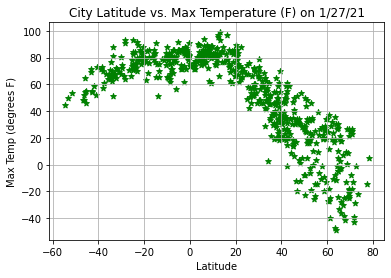

In [433]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Max Temp (degrees F)"],marker = "*", c= "g")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/27/21")
plt.grid(True)
plt.savefig("../output_data/Fig1")
plt.show()

## Latitude vs. Humidity Plot

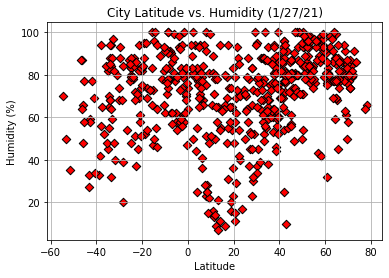

In [435]:
plt.scatter( x= clean_city_data["Lat"], y = clean_city_data["Humidity"],c = "r", marker = "D", edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/27/21)")
plt.savefig("../output_data/Fig2")
plt.show()

## Latitude vs. Cloudiness Plot

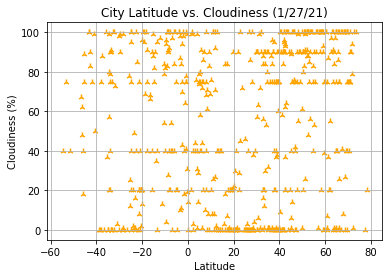

In [437]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Cloudiness"], c = "orange", marker = "2", edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (1/27/21)")
plt.savefig("../output_data/Fig3")
plt.show()

## Latitude vs. Wind Speed Plot

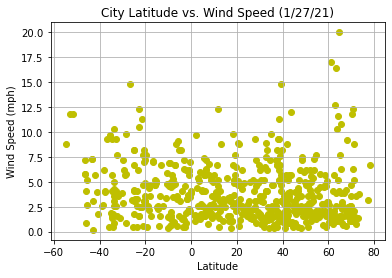

In [439]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Wind Speed"], c = "y")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/27/21)")
plt.savefig("../output_data/Fig4")
plt.show()

## Linear Regression

In [440]:
north_hem = clean_city_data[clean_city_data["Lat"]>=0]
south_hem = clean_city_data[clean_city_data["Lat"]<0]
#linregress with the plots below

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r- value is: -0.8709847358837759


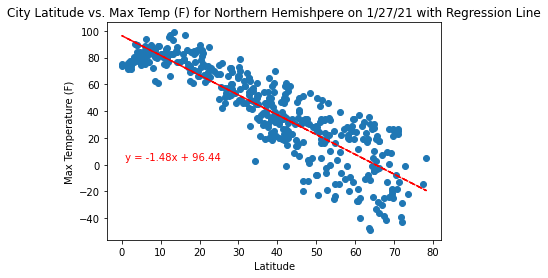

In [442]:
linregress0 = linregress(x = north_hem["Lat"], y = north_hem["Max Temp (degrees F)"])
m0 = round(linregress0[0],2)
b0 = round(linregress0[1],2)
r0 = linregress0[2]
bestfit0 = m0*(north_hem["Lat"]) + b0
print(f'The r- value is: {r0}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Max Temp (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temp (F) for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit0, "--",color = "red")
plt.text(x = 0, y = 3, s = (f' y = {m0}x + {b0}'), c = "red")
plt.savefig("../output_data/Fig5")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r- value is: 0.6097072315667009


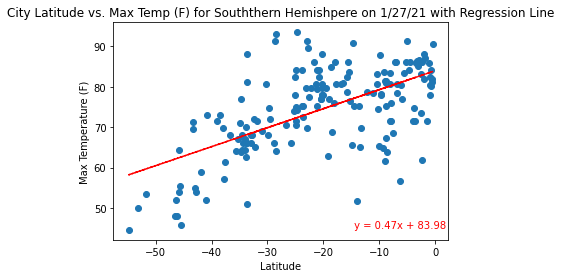

In [444]:
linregress1 = linregress(x = south_hem["Lat"], y = south_hem["Max Temp (degrees F)"])
m1 = round(linregress1[0],2)
b1 = round(linregress1[1],2)
r1 = linregress1[2]
bestfit1 = m1*(south_hem["Lat"]) + b1
print(f'The r- value is: {r1}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Max Temp (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temp (F) for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit1, "--",color = "red")
plt.text(x = -15, y = 45, s = (f' y = {m1}x + {b1}'), c = "red")
plt.savefig("../output_data/Fig6")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.3929714133055517


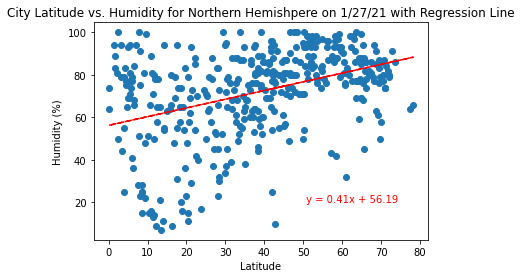

In [446]:
linregress2 = linregress(x = north_hem["Lat"], y = north_hem["Humidity"])
m2 = round(linregress2[0],2)
b2 = round(linregress2[1],2)
r2 = linregress2[2]
bestfit2 = m2*(north_hem["Lat"]) + b2
print(f'The r- value is: {r2}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit2, "--",color = "red")
plt.text(x =50, y = 20, s = (f' y = {m2}x + {b2}'), c = "red")
plt.savefig("../output_data/Fig7")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.28866160847311656


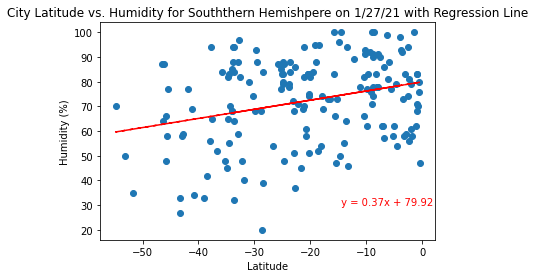

In [448]:
linregress3 = linregress(x = south_hem["Lat"], y = south_hem["Humidity"])
m3 = round(linregress3[0],2)
b3 = round(linregress3[1],2)
r3 = linregress3[2]
bestfit3 = m3*(south_hem["Lat"]) + b3
print(f'The r- value is: {r3}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit3, "--",color = "red")
plt.text(x = -15, y = 30, s = (f' y = {m3}x + {b3}'), c = "red")
plt.savefig("../output_data/Fig8")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r- value is: 0.2882426431538573


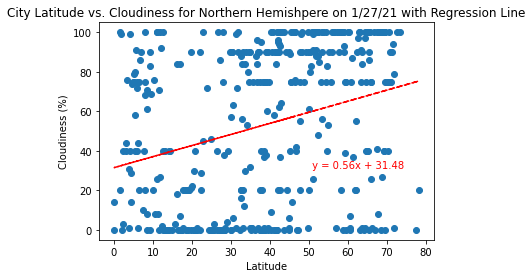

In [450]:
linregress4 = linregress(x = north_hem["Lat"], y = north_hem["Cloudiness"])
m4 = round(linregress4[0],2)
b4 = round(linregress4[1],2)
r4 = linregress4[2]
bestfit4 = m4*(north_hem["Lat"]) + b4
print(f'The r- value is: {r4}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit4, "--",color = "red")
plt.text(x =50, y = 31, s = (f' y = {m4}x + {b4}'), c = "red")
plt.savefig("../output_data/Fig9")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r- value is: 0.11616876233099929


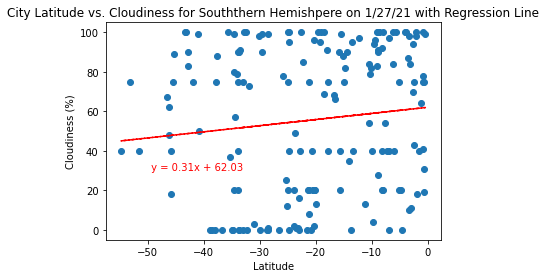

In [452]:
linregress5 = linregress(x = south_hem["Lat"], y = south_hem["Cloudiness"])
m5 = round(linregress5[0],2)
b5 = round(linregress5[1],2)
r5 = linregress5[2]
bestfit5 = m5*(south_hem["Lat"]) + b5
print(f'The r- value is: {r5}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit5, "--",color = "red")
plt.text(x = -50, y = 30, s = (f' y = {m5}x + {b5}'), c = "red")
plt.savefig("../output_data/Fig10")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: 0.01962475758322217


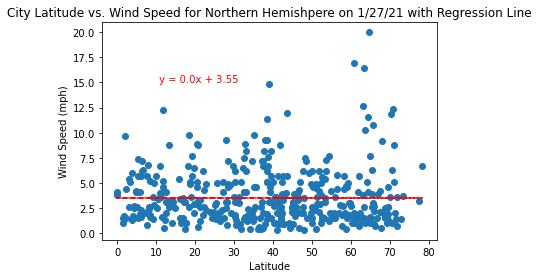

In [454]:
linregress6 = linregress(x = north_hem["Lat"], y = north_hem["Wind Speed"])
m6 = round(linregress6[0],2)
b6 = round(linregress6[1],2)
r6 = linregress6[2]
bestfit6 = m6*(north_hem["Lat"]) + b6
print(f'The r- value is: {r6}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit6, "--",color = "red")
plt.text(x =10, y = 15, s = (f' y = {m6}x + {b6}'), c = "red")
plt.savefig("../output_data/Fig11")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: -0.1811204770394125


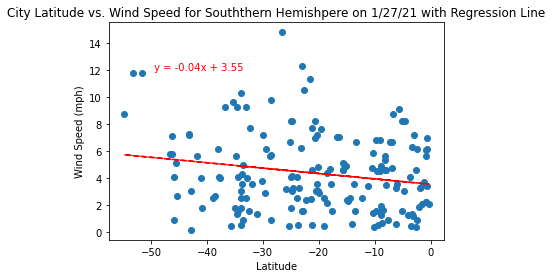

In [455]:
linregress7 = linregress(x = south_hem["Lat"], y = south_hem["Wind Speed"])
m7 = round(linregress7[0],2)
b7 = round(linregress7[1],2)
r7 = linregress7[2]
bestfit7 = m7*(south_hem["Lat"]) + b7
print(f'The r- value is: {r7}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit7, "--",color = "red")
plt.text(x = -50, y = 12, s = (f' y = {m7}x + {b7}'), c = "red")
plt.savefig("../output_data/Fig12")
plt.show()